In [ ]:
! pip3 install -r requirements.txt

In [ ]:
pip install matplotlib

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Get Font 1 templates ready

In [6]:
# Path to the folder containing your JPEG images
folder_path = 'digits/font_1/'
# Create lists to store original and processed images
original_images = []
processed_images = []


In [7]:
# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        print(filename)
        # Read the image in grayscale
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, 0)
        # Threshold the image to create a binary mask
        _, thresh = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Get the height and width of the image
        height, width = image.shape[:2]

        # Create a mask to fill border-connected regions
        mask = np.zeros((height + 2, width + 2), dtype=np.uint8)
        for contour in contours:
            # Get bounding box coordinates
            x, y, w, h = cv2.boundingRect(contour)

            # If contour touches the border of the image, fill it with white in the mask
            if x == 0 or y == 0 or x + w == width or y + h == height:
                cv2.drawContours(mask, [contour], 0, 255, -1)  # Fill contour in the mask

        # Crop the mask to match the size of the input image
        mask = mask[1:-1, 1:-1]

        # Apply the mask to the original image to turn border-connected pixels black
        result = image.copy()
        result[mask == 255] = 0  # Set pixels to black where mask is white

        # Append original and processed images to lists
        original_images.append(image)
        processed_images.append(result)


1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


(-0.5, 110.5, 110.5, -0.5)

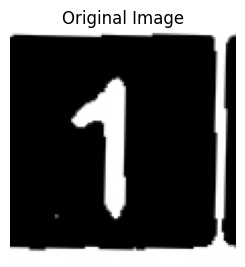

In [8]:
# Function to make border pixels black
def make_border_black(image_array):
    height, width = image_array.shape
    image_array[0, :] = 0  # Top border
    image_array[height - 1, :] = 0  # Bottom border
    image_array[:, 0] = 0  # Left border
    image_array[:, width - 1] = 0  # Right border
    return image_array

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_images[0], cmap='gray')
plt.axis('off')



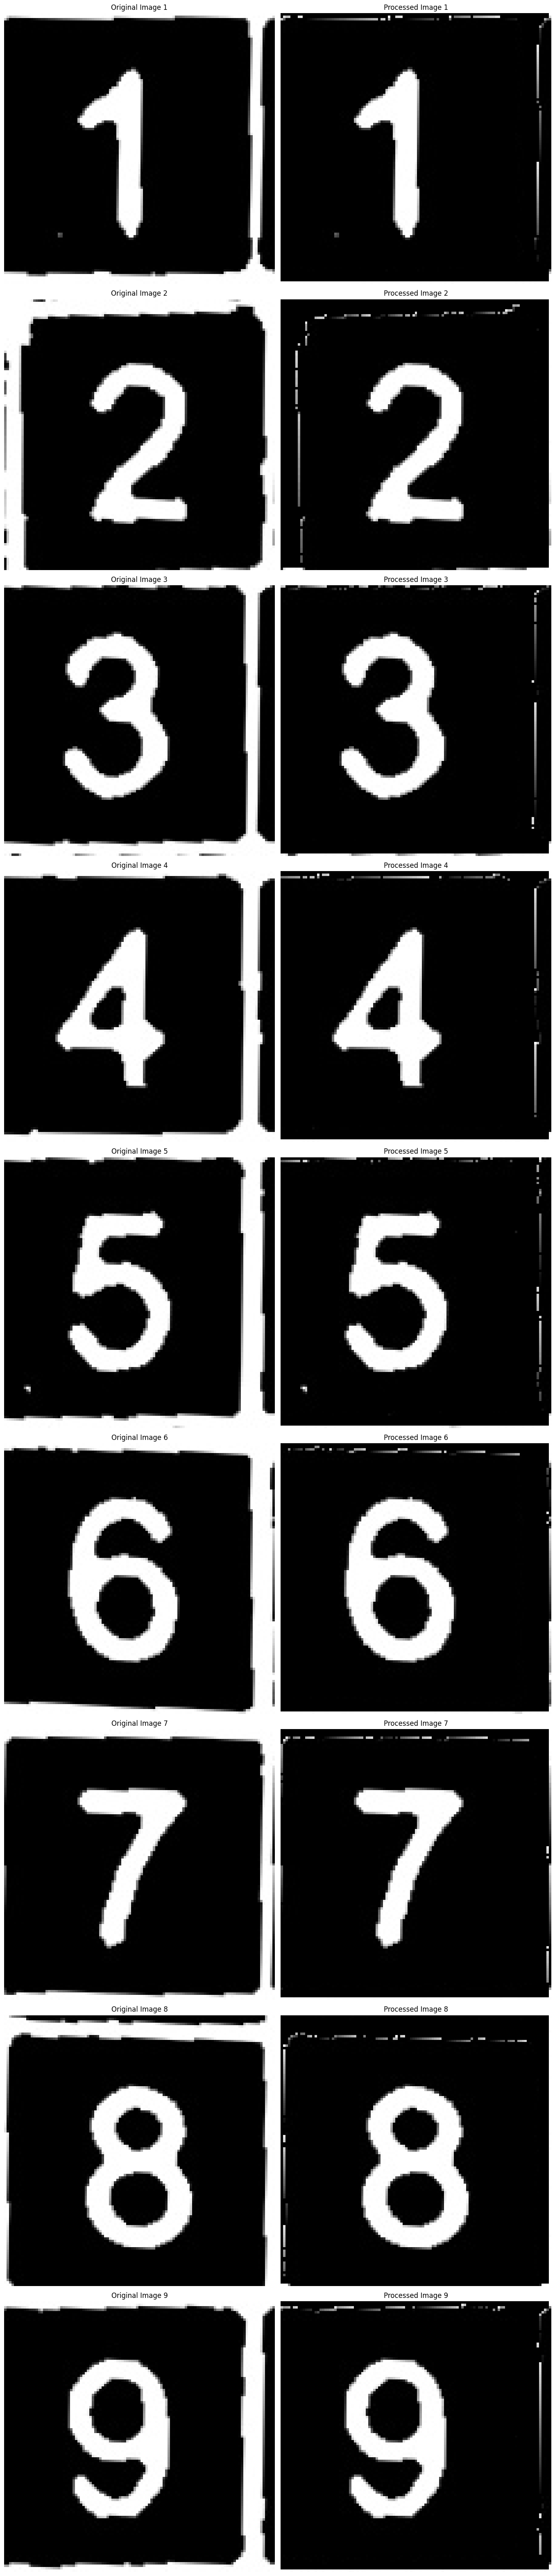

In [9]:
# Show original vs processed images
num_images = len(processed_images)

plt.figure(figsize=(14, 7 * num_images))
for i in range(num_images):
    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(num_images, 2, i * 2 + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
def find_and_draw_longest_lines(image):
    edges = cv2.Canny(image, 50, 300)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=40)

    longest_vertical_line = None
    longest_horizontal_line = None
    max_vertical_length = 0
    max_horizontal_length = 0
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
    
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
    
            line_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
            if np.abs(b) > 0.1:  # Vertical line
                if line_length > max_vertical_length:
                    max_vertical_length = line_length
                    longest_vertical_line = (x1, y1, x2, y2)
            else:  # Horizontal line
                if line_length > max_horizontal_length:
                    max_horizontal_length = line_length
                    longest_horizontal_line = (x1, y1, x2, y2)

    if longest_vertical_line is not None:
        x1, y1, x2, y2 = longest_vertical_line
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), 15)

    if longest_horizontal_line is not None:
        x1, y1, x2, y2 = longest_horizontal_line
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), 15)

    return image

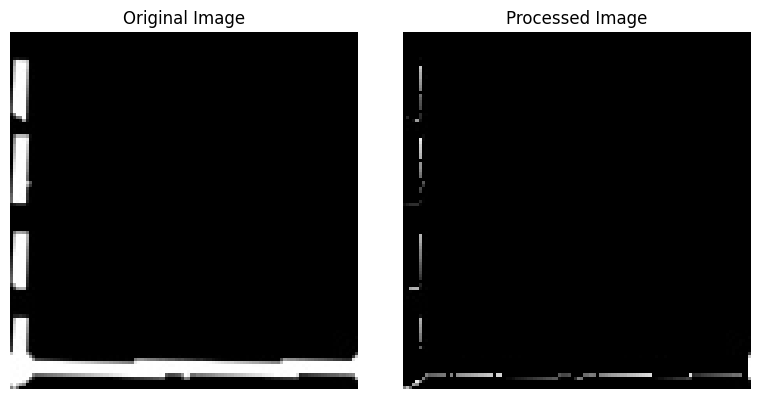

In [11]:
def remove_border_connected(image):
    # Read the image in grayscale
    #image = cv2.imread(image_path, 0)  # Replace with your image path

    # Threshold the image to create a binary mask
    _, thresh = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Create a mask to fill border-connected regions
    mask = np.zeros((height + 2, width + 2), dtype=np.uint8)

    # Iterate through each contour
    for contour in contours:
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # If contour touches the border of the image, fill it with white in the mask
        if x == 0 or y == 0 or x + w == width or y + h == height:
            cv2.drawContours(mask, [contour], 0, 255, -1)  # Fill contour in the mask

    # Crop the mask to match the size of the input image
    mask = mask[1:-1, 1:-1]

    # Apply the mask to the original image to turn border-connected pixels black
    result = image.copy()
    result[mask == 255] = 0  # Set pixels to black where mask is white

    return result

# Example usage:
image_path = 'phase1_digits/font_3/test_3/tile_1_4.jpg'  # Replace with your image path
processed_image = remove_border_connected(cv2.imread(image_path, 0))

# Display the original and processed images
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(cv2.imread(image_path, 0), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Read the grayscale image
#gray_image = cv2.imread('digits/6.jpg', 0)  # Replace 'path_to_your_grayscale_image.jpg' with the actual path
gray_image = cv2.imread('phase1_digits/font_2/test_9/tile_7_8.jpg', 0)  # Replace 'path_to_your_grayscale_image.jpg' with the actual path
if gray_image is None:
    print('Image not found.')
gray_image = make_border_black(gray_image)  
# gray_image = find_and_draw_longest_lines(gray_image)
inverted_gray_image = cv2.bitwise_not(gray_image)
_, inverted_binarized_image = cv2.threshold(inverted_gray_image, 120, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed
NUMBER = -1

## Template Matching

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the folder containing template images
template_folder = 'digits/font_3/'

# Path to the folder containing box images
box_folder = 'phase1_digits/font_3/test_1'

# Threshold for template matching
matching_threshold = 0.5  # Adjust this threshold as needed

# Create a list to store the results
matching_results = []

# Loop through each box image
for i in range(9):
    row_boxes = []
    for j in range(9):
        # Load the box image
        box_path = os.path.join(box_folder, f'tile_{i}_{j}.jpg')
        box_image = cv2.imread(box_path)
        gray_box_image = cv2.cvtColor(box_image, cv2.COLOR_BGR2GRAY)

        # Loop through each template image
        max_template_score = float('-inf')
        best_template = None
        for template_file in os.listdir(template_folder):
            template_path = os.path.join(template_folder, template_file)
            template = cv2.imread(template_path, 0)

            # Match the template with the box image
            result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)

            # Get the maximum match score
            _, _, _, max_loc = cv2.minMaxLoc(result)
            max_score = result[max_loc[1], max_loc[0]]

            # Update the best template if the current score is higher and above the threshold
            if max_score > max_template_score and max_score > matching_threshold:
                max_template_score = max_score
                best_template = template_file

        # Store the result for this box image
        row_boxes.append((max_template_score, best_template))

    # Store the results for this row of box images
    matching_results.append(row_boxes)

# Display the results
# for i, row in enumerate(matching_results):
#     for j, (score, template) in enumerate(row):
#         print(f'Tile ({i},{j}): Best Match Score: {score}, Template: {template}')

# # Optionally, you can visualize the results using matplotlib
# # Note: Ensure that you have the correct file paths for the template and box images
for i, row in enumerate(matching_results):
    for j, (score, template) in enumerate(row):
        box_path = os.path.join(box_folder, f'tile_{i}_{j}.jpg')
        box_image = cv2.imread(box_path)

        plt.subplot(9, 9, i * 9 + j + 1)
        plt.imshow(cv2.cvtColor(box_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{score:.2f}\n{template}', fontsize=8, color='red')
        plt.axis('off')

plt.show()


 # SIFT

In [12]:
import cv2

def match_images_with_SIFT(gray_image, processed_images, flag):
    sift = cv2.SIFT_create()
    matches_count = [0] * len(processed_images)  # Assuming there are digits from 0 to 9

    keypoints_sample, descriptors_sample = sift.detectAndCompute(gray_image, None)

    for i, processed_image in enumerate(processed_images, 1):
        keypoints_processed, descriptors_processed = sift.detectAndCompute(processed_image, None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(descriptors_sample, descriptors_processed, k=2)

        good_matches = []
        for m, n in matches:
            if m.distance < 0.5 * n.distance:
                good_matches.append(m)
        
        matches_count[i-1] = len(good_matches)  # Update matches count at index i - 1
        result_image = cv2.drawMatches(gray_image, keypoints_sample, processed_image, keypoints_processed, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        if flag:
            
    
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
            ax[0].imshow(gray_image, cmap='gray')
            ax[0].set_title('Sample Digit')
            ax[0].axis('off')
    
            ax[1].imshow(processed_image, cmap='gray')
            ax[1].set_title('Processed Image')
            ax[1].axis('off')
    
            ax[2].imshow(result_image)
            ax[2].set_title(f'Matches - Good Matches: {len(good_matches)}')
            ax[2].axis('off')
    
            plt.tight_layout()
            plt.show()
        # Visualization code (commented out for returning matches_count)

    return matches_count

# ORB

In [ ]:
# Example usage:
# Assuming 'gray_image' is the sample image and 'original_images' contains the processed images
matches_array = match_images_with_SIFT(gray_image, processed_images,True)
matches_array


In [13]:
def match_images_with_ORB(gray_image, processed_images,flag):
    orb = cv2.ORB_create()
    matches_count = [0] * len(processed_images)  # Initialize matches_count with the length of processed_images

    keypoints_sample_orb, descriptors_sample_orb = orb.detectAndCompute(gray_image, None)

    for i, original_image in enumerate(processed_images):
        keypoints_processed_orb, descriptors_processed_orb = orb.detectAndCompute(original_image, None)
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(descriptors_sample_orb, descriptors_processed_orb)

        matches = sorted(matches, key=lambda x: x.distance)

        good_matches_orb = []
        for m in matches:
            if m.distance < 40:  # Adjust this threshold as needed
                good_matches_orb.append(m)

        matches_count[i] = len(good_matches_orb)  # Update matches count at index i
        result_image = cv2.drawMatches(gray_image, keypoints_sample_orb, original_image, keypoints_processed_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        if flag:
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
            ax[0].imshow(gray_image, cmap='gray')
            ax[0].set_title('Sample Digit')
            ax[0].axis('off')
    
            ax[1].imshow(original_image, cmap='gray')
            ax[1].set_title('Processed Image')
            ax[1].axis('off')
    
            ax[2].imshow(result_image)
            ax[2].set_title(f'Matches - Good Matches: {len(good_matches_orb)}')
            ax[2].axis('off')
    
            plt.tight_layout()
            plt.show()

    return matches_count

In [ ]:
match_images_with_ORB(gray_image, processed_images,True)

In [16]:
ROWS = 9
COLS = 9

# Define an empty 2D list to store the boxes
sudoku_boxes = []
template_folder = 'digits/font_1/'
matching_threshold= 0.88
# Iterate through each box and load it into the 2D array
for i in range(ROWS):
    row_boxes = []
    for j in range(COLS):
        # Load the box image
        box_folder = f'phase1_digits/font_1/test_6/tile_{i}_{j}.jpg'
        box_image = cv2.imread(box_folder, 0)
        gray_box_image = box_image.copy()

        # Loop through each template image
        max_template_score = float('-inf')
        best_template = None
        template_scores = []  # Array to store the scores for each template
        for template_file in os.listdir(template_folder):
            template_path = os.path.join(template_folder, template_file)
            template = cv2.imread(template_path, 0)

            # Match the template with the box image
            result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)

            # Get the maximum match score
            _, _, _, max_loc = cv2.minMaxLoc(result)
            max_score = result[max_loc[1], max_loc[0]]

            # Update the template_scores array
            template_scores.append(max_score)

            # Update the best template if the current score is higher and above the threshold
            if max_score > max_template_score and max_score > matching_threshold:
                max_template_score = max_score
                best_template = template_file

      
        # box_image = make_border_black(box_image)

        box_image[:, 0:16] = 0
        box_image[:, -16:] = 0
        # box_image[0:16, :] = 0
        box_image[-16:, :] = 0
        
        
       
        # box_image = cv2.morphologyEx(box_image, cv2.MORPH_ERODE, np.ones((3, 3), np.uint8))
        # # dilation
        # box_image = cv2.morphologyEx(box_image, cv2.MORPH_DILATE, np.ones((3, 3), np.uint8))
        
        # plt.imshow(box_image, cmap ='gray')
        # plt.axis('on') 
        # plt.show()

        matches_count_sift = match_images_with_SIFT(box_image, processed_images,False)
        matches_count_orb = match_images_with_ORB(box_image, processed_images,False)
       
        print(f"matches SIFT: {matches_count_sift}, matches ORB: {matches_count_orb}" )
        template_scores = [int(score * 10) for score in template_scores]
        print(f"Template Scores for tile_{i}_{j}: {[score for score in template_scores]}")
        average_arr = [(x + y) / 2 for x, y in zip(matches_count_sift, matches_count_orb)]
        num_zeros = matches_count_orb.count(0)
        print(f"num_zeros: {num_zeros}")
        if all(element <= 1 for element in average_arr)  or (num_zeros >= 6 and matches_count_sift.count(0)>=5) or all(element ==0 for element in matches_count_orb)  :
            max_index=-1
            print (f"tile_{i}_{j} is empty")
        else:
            combined_list = [x + y + 0.4*score for x, y, score in zip(matches_count_sift, matches_count_orb, template_scores)]
            # combined_list = [x + y for x, y in zip(matches_count_sift, matches_count_orb)]            

            combined_list = [int(score) for score in combined_list]
            print (f"combined_list: {combined_list}")
            
            max_index = combined_list.index(max(combined_list)) 

            

            
        # if (max_index+1) == 6 or (max_index+1) == 9:
        #     template_path = 'digits/font_3_corner/10.jpg'
        #     template = cv2.imread(template_path, 0)
        #     result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)
        #     _, _, _, max_loc = cv2.minMaxLoc(result)
        #     max_score = result[max_loc[1], max_loc[0]]
        #     template_path ='digits/font_3_corner/6.jpg'
        #     template = cv2.imread(template_path, 0)
        #     result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)
        #     _, _, _, max_loc = cv2.minMaxLoc(result)
        #     max_score_2 = result[max_loc[1], max_loc[0]]
    
        #     template_path = 'digits/font_3_corner/9.jpg'
        #     template = cv2.imread(template_path, 0)
        #     result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)
        #     _, _, _, max_loc = cv2.minMaxLoc(result)
        #     max_score_3 = result[max_loc[1], max_loc[0]]

        #     template_path = 'digits/font_3_corner/11.jpg'
        #     template = cv2.imread(template_path, 0)
        #     result = cv2.matchTemplate(gray_box_image, template, cv2.TM_CCORR_NORMED)
        #     _, _, _, max_loc = cv2.minMaxLoc(result)
        #     max_score_4 = result[max_loc[1], max_loc[0]]
        #     # get the maximum of all scores
        #     max_val = max(max_score_3, max_score_4, max_score_2, max_score)
        #     if (max_val == max_score_2 or max_val == max_score):
        #         max_index = 5
        #     elif (max_val == max_score_3 or max_val == max_score_4):
        #         max_index = 8
        #     print(f"max_index 6 or 9: {max_index+1}")
        # else:
        #     print (f"max_index: {max_index+1}")
        
        print (f"max_index: {max_index+1}")
        row_boxes.append(max_index+1)

    sudoku_boxes.append(row_boxes)


matches SIFT: [7, 3, 1, 1, 1, 1, 9, 0, 4], matches ORB: [1, 9, 2, 2, 1, 0, 20, 1, 3]
Template Scores for tile_0_0: [4, 3, 5, 5, 5, 3, 4, 2, 5]
num_zeros: 1
combined_list: [9, 13, 5, 5, 4, 2, 30, 1, 9]
max_index: 7
matches SIFT: [1, 0, 0, 0, 0, 0, 0, 0, 0], matches ORB: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Template Scores for tile_0_1: [0, 0, 0, 0, 0, 0, 0, 0, 0]
num_zeros: 9
tile_0_1 is empty
max_index: 0
matches SIFT: [12, 1, 0, 1, 0, 1, 1, 0, 0], matches ORB: [1, 6, 2, 0, 0, 0, 3, 0, 0]
Template Scores for tile_0_2: [1, 1, 1, 1, 1, 1, 0, 2, 1]
num_zeros: 5
combined_list: [13, 7, 2, 1, 0, 1, 4, 0, 0]
max_index: 1
matches SIFT: [5, 0, 6, 1, 0, 0, 1, 0, 0], matches ORB: [1, 10, 15, 0, 8, 7, 0, 14, 7]
Template Scores for tile_0_3: [2, 1, 1, 2, 1, 2, 2, 2, 1]
num_zeros: 2
combined_list: [6, 10, 21, 1, 8, 7, 1, 14, 7]
max_index: 3
matches SIFT: [5, 0, 0, 0, 0, 0, 2, 0, 0], matches ORB: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Template Scores for tile_0_4: [0, 1, 0, 1, 1, 0, 0, 1, 1]
num_zeros: 9
tile_0_4 is emp

In [17]:
sudoku_boxes

[[7, 0, 1, 3, 0, 9, 0, 0, 5],
 [0, 0, 0, 0, 0, 1, 6, 0, 4],
 [5, 0, 4, 0, 0, 0, 7, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [8, 0, 7, 6, 0, 4, 9, 0, 0],
 [0, 1, 0, 5, 0, 0, 3, 0, 6],
 [9, 0, 3, 0, 6, 5, 0, 8, 7],
 [0, 5, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 8, 3, 0, 0, 0, 9]]

In [ ]:
plt.imshow('phase1_digits/font_3/test_3/tile_7_1.jpg')

In [ ]:
import cv2
import numpy as np

def surf_matching(image_path, template_path):
    # Read the images
    img = cv2.imread(image_path, 0)  # Read the image as grayscale
    template = cv2.imread(template_path, 0)  # Read the template as grayscale

    # Initialize SURF detector
    surf = cv2.xfeatures2d.SURF_create()

    # Find keypoints and descriptors in the image and template
    kp1, des1 = surf.detectAndCompute(img, None)
    kp2, des2 = surf.detectAndCompute(template, None)

    # Create a Brute-Force Matcher object
    bf = cv2.BFMatcher()

    # Match descriptors of the image and template
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test to obtain good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img, kp1, template, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches

# Example usage:
image_path = 'your_image_path.jpg'  # Replace with your image path
template_path = 'your_template_path.jpg'  # Replace with your template path

result_image = surf_matching(image_path, template_path)

# Display the resulting image with matches
cv2.imshow('SURF Matches', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
test_2 = [[0,3,0,1,5,6,0,0,0],
          [0,8,0,0,2,0,0,7,0],
          [6,0,0,0,0,0,5,0,0],
          [0,1,0,6,0,0,9,0,0],
          [2,0,0,9,4,1,0,0,6],
          [0,0,8,0,0,5,0,1,0],
          [0,0,7,0,0,0,0,0,9],
          [0,5,0,0,1,0,0,8,0],
          [0,0,0,2,6,8,0,4,0]]